In [110]:
# 문제를 인식 -> 데이터를 수집-> 전처리 -> 모델을 학습 -> web app -> deploy(배포)
                                                    # keras.js, tensorflow.js
    
# 혹은 model server 서비스 : DB에서 데이터를 전달받는 것처럼 또는 edge computing
# keras, tf의 하위 서브모듈
from tensorflow.keras.models import Sequential # +Functional, model class
from tensorflow.keras.layers import Dense # 풀리커넥트

import numpy as np
import tensorflow as tf

# 의사난수 초기화 : 난수를 흉내낸 컴퓨터생성 난수
np.random.seed(3)
tf.random.set_seed(3)

Data_set = np.loadtxt('./dataset/ThoraricSurgery.csv', delimiter=",")
X = Data_set[:,0:17] # 독립변수
Y = Data_set[:,17] # 종속변수

model = Sequential()# 모델에 레이어를 추가, add
model.add(Dense(30, input_dim=17, activation='relu')) # 아웃풋 차수 ?x17 17x30 ?x30

# ?x30 30x1 ?x1
model.add(Dense(1, activation='sigmoid'))

# 0~1사이의 값으로 출력 0.5보다 크면 1, 0.5보다 작으면 0 : 이진
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=100, batch_size=10, verbose=0)


In [8]:
model.evaluate(X, Y)# train data에 대한 평가

15/15 [==============================] - 0s 678us/step - loss: 0.1222 - accuracy: 0.8617


[0.12218867242336273, 0.8617021441459656]

In [102]:
# model.predict(X)

In [18]:
model.summary() 
# 가중치 17x30 = 510 + bias 30 = 540
# 30x1 + bias 1 = 31 # 가중치를 저장하는 공간

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                540       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 별도 패키지로 프로그래밍, 이런것도 있다 ->CNTK(ms에서 만든 딥러닝 프레임워크), theano, mxnet
import tensorflow.keras.backend as K # tensorflow
import numpy as np
np.random.seed(42)
x = np.random.rand(3, 3)
y = np.random.rand(3, 2)

x_var = K.variable(value=x)
y_var = K.variable(value=y)

xy = K.dot(x_var,y_var)
matrix_product = K.eval(xy)
matrix_product

array([[1.3427397 , 0.9322196 ],
       [0.60834146, 0.17056336],
       [1.0088804 , 0.8315352 ]], dtype=float32)

In [20]:
# 당뇨명 여부
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./dataset/pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"]) 

In [21]:
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [22]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


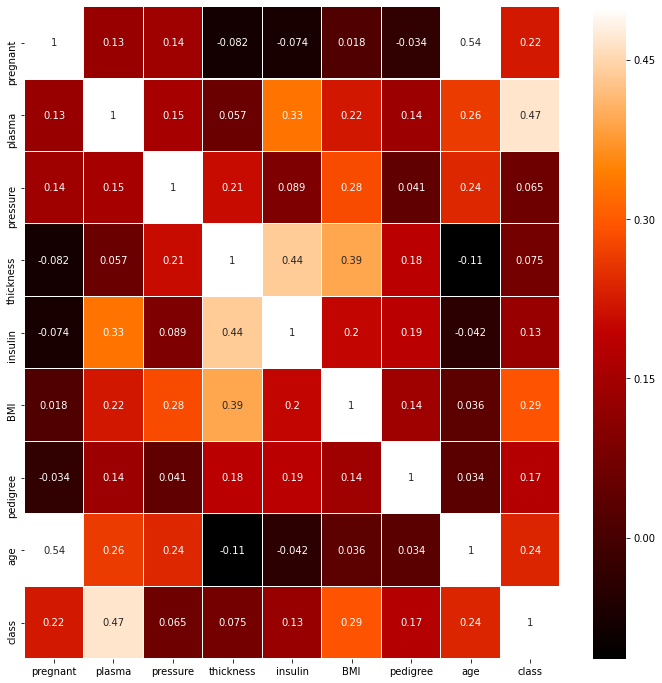

In [23]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

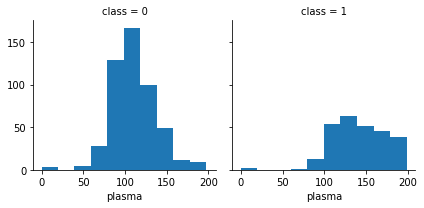

In [24]:
grid = sns.FacetGrid(df, col='class') # 화면을 분할
grid.map(plt.hist, 'plasma', bins=10) # 공복혈당 : 인슐린이 적다 -> 인슐린 주사
plt.show()

In [27]:
"""
임신회수당 당뇨병 발병확률 (데이터 요약기능)
- cross_table, pivot, pivot_table, groupby
"""
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [111]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러 옵니다.
dataset = numpy.loadtxt("./dataset/pima-indians-diabetes.csv", delimiter=",") # 넘파이로 로딩
X = dataset[:,0:8] # 넘파이 배열식, pandas : iloc loc
Y = dataset[:,8]

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) # 8x12
model.add(Dense(8, activation='relu')) # 12x8
model.add(Dense(1, activation='sigmoid')) # 8x1

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', # on/off 판단
             optimizer='adam',
             metrics=['accuracy'])

# 모델을 실행합니다.
model.fit(X, Y, epochs=200, batch_size=10, verbose=0)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

24/24 [==============================] - 0s 582us/step - loss: 0.4592 - accuracy: 0.7721

 Accuracy: 0.7721


In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='network.png')

model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializ

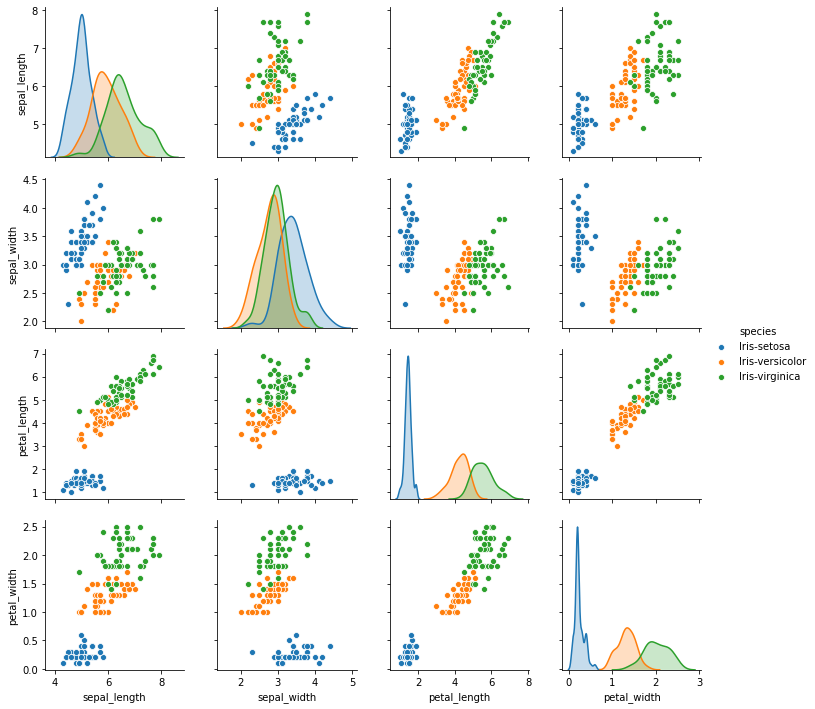

In [112]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
df = pd.read_csv('./dataset/iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

# 그래프로 확인
sns.pairplot(df, hue='species');
plt.show()

In [22]:
"""
문제
-열별 데이터 정보를 출력하시오
-species를 기준으로 각열의 평균을 출력하시오
"""
print(df.shape, end='\n\n\n')
print(df.info(), end='\n\n\n')
print(df.describe(), end='\n\n\n')
print(df.groupby('species').mean())

(150, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


                 sepal_length  sepal_width  petal_length  petal_width
species                       

In [113]:
# 데이터 분류
dataset = df.values
X = dataset[:,0:4].astype(float) # 부동소수점
Y_obj = dataset[:,4] # 

# 문자열을 숫자로 변환
e = LabelEncoder() # 숫자변환
e.fit(Y_obj) # 범주형데이터
Y = e.transform(Y_obj) # 원래데이터를 변형 : 0, 1, 2
Y_encoded = tf.keras.utils.to_categorical(Y) # 원핫인코딩

# 모델의 설정
model = Sequential() 
# 독립변수 4개 x 16 + 16 : 확장 데이터간의 간격을
model.add(Dense(16,  input_dim=4, activation='relu'))
# (? x 16) 16x3 =? ?x3 => 원핫인코딩 결과 
model.add(Dense(3, activation='softmax')) # 확률값으로 변경

# 모델 컴파일
model.compile(loss='categorical_crossentropy',# 확률을 log사용하여 비용값으로 변경 원핫인코딩
            optimizer='adam', # RMSProp + momentum
            metrics=['accuracy']) 

# 모델 실행
history = model.fit(X, Y_encoded, epochs=50, batch_size=1, verbose=0) # 50x150

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))
print("\n Loss: %.4f" % (model.evaluate(X, Y_encoded)[0])) # 0번은 손실값

5/5 [==============================] - 0s 523us/step - loss: 0.1024 - accuracy: 0.9733

 Accuracy: 0.9733
5/5 [==============================] - 0s 599us/step - loss: 0.1024 - accuracy: 0.9733

 Loss: 0.1024


In [24]:
print(df.head()) # species가ㅏ 문자열로 구성

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


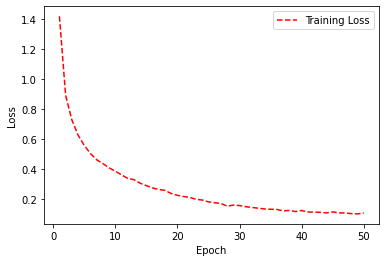

In [30]:
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

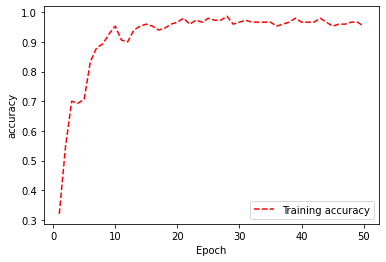

In [32]:
training_accuracy = history.history['accuracy']
epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count, training_accuracy, 'r--')
plt.legend(['Training accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 입력
df = pd.read_csv('./dataset/sonar.csv', header=None)
'''
# 데이터 개괄 보기
print(df.info())

# 데이터의 일부분 미리 보기
print(df.head())
'''
dataset = df.values
X = dataset[:,0:60]
X = np.asarray(X).astype(np.float32)
Y_obj = dataset[:,60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 학습 셋과 테스트 셋의 구분
from sklearn.model_selection import train_test_split #  과적합(train data에 과하게 적합) 피하기 위해
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# 모델 설정
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu')) # 60x24 + 24
model.add(Dense(10, activation='relu')) # 24x10 + 10
model.add(Dense(1, activation='sigmoid')) # 10x1 + 1

# 모델 컴파일
model.compile(loss='mean_squared_error', # 숫자이고 이진 데이터라 사용
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
# model.fit(X, Y, epochs=200, batch_size=5)
history = model.fit(X_train, Y_train, epochs=130, batch_size=5, verbose=0)

# 결과 출력
# print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))
# 테스트셋에 모델 적용
# print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

from tensorflow.keras.models import load_model
model.save('my_model.h5')  # 모델을 컴퓨터에 저장

del model       # 테스트를 위해 메모리 내의 모델을 삭제
model = load_model('my_model.h5') # 모델을 새로 불러옴

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))  # 불러온 모델로 테스트 실행


2/2 [==============================] - 0s 464us/step - loss: 0.1447 - accuracy: 0.8571

 Test Accuracy: 0.8571


In [51]:
"""
데이터 갯수
-마지막열이 종속변수 - 종속변수의 범주확인 ( value_count, unique )
"""
print(df.head(), end='\n\n\n')
print(df.shape, end='\n\n\n')
# print(df.info(), end='\n\n\n')
# print(df.describe(), end='\n\n\n')
# print(df.groupby('species').mean())
print(df[60].unique()) 

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [ ]:
# Bias - variace trade off 그래프 p167 그림 13-3

In [115]:
#층화 K-Fold
from sklearn.model_selection import StratifiedKFold

# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed) # 한쪽으로 쏠림이 없는 데이터 생성

# 빈 accuracy 배열
accuracy = []

# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu')) # 60x24
    model.add(Dense(10, activation='relu')) # 24x10
    model.add(Dense(1, activation='sigmoid')) # 10x1
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5, verbose=0)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

# 결과 출력
print("\n %.f fold accuracy:" % n_fold, accuracy)

1/1 [==============================] - 0s 0s/step - loss: 0.1047 - accuracy: 0.8500

 10 fold accuracy: ['0.8636', '0.8571', '0.8571', '0.9048', '0.7619', '0.8095', '0.8095', '0.9000', '0.8000', '0.8500']


In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 시스템이 콜하는 함수 : 콜백 - 등록된 이벤트 발생하면 실행
# EarlyStopping : accuracy가 낮아지는 방향으로 변화가 생기면 중지 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 입력
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df = df_pre.sample(frac=1) # sampling 데이터 어느정도 가저올것인가? 100%


In [65]:
df_pre.shape

(6497, 13)

In [66]:
df_pre.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [70]:
df[12].unique()

array([0, 1], dtype=int64)

In [105]:

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 마지막 sigmoid 0,1 사이로 매핑하기 위해

#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정 # 모델 최적화
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5" # 최적화된 모델을 저장할 위치 # 모델저장 : 모델구조+가중치
checkpointer = ModelCheckpoint(filepath=modelpath,  
                               # validaion loss 값을 체킹 
                               monitor='val_loss', verbose=0, save_best_only=True) #verbose 로그출력
# 모델 실행
# model.fit(X, Y, epochs=200, batch_size=200, callbacks=[checkpointer])

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

# 모델 실행
history = model.fit(X, Y, validation_split=0.2, epochs=1000, batch_size=500, verbose=0, callbacks=[early_stopping_callback, checkpointer])



# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))





204/204 [==============================] - 0s 596us/step - loss: 0.0353 - accuracy: 0.9897

 Accuracy: 0.9897


In [69]:
"""
오후 시작 ===========================================================================================================================================================================================================
"""

array([0, 1], dtype=int64)

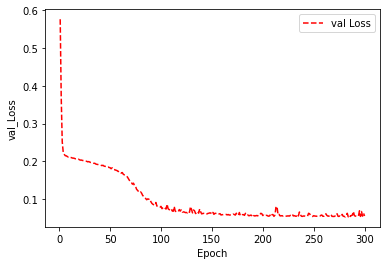

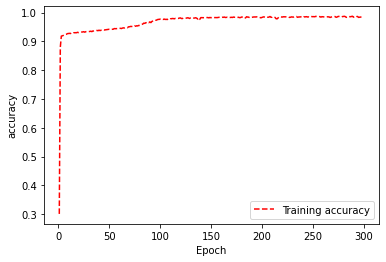

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 30)                390       
_________________________________________________________________
dense_108 (Dense)            (None, 12)                372       
_________________________________________________________________
dense_109 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [90]:
"""
그래프로 accuracy와 val_loss를 출력해보시오
모델의 구조를 출력하시오
"""
val_loss = history.history['val_loss']
epoch_count = range(1, len(val_loss) + 1)
plt.plot(epoch_count, val_loss, 'r--')
plt.legend(['val Loss'])
plt.xlabel('Epoch')
plt.ylabel('val_Loss')
plt.show()

training_accuracy = history.history['accuracy']
epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count, training_accuracy, 'r--')
plt.legend(['Training accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

model.summary()

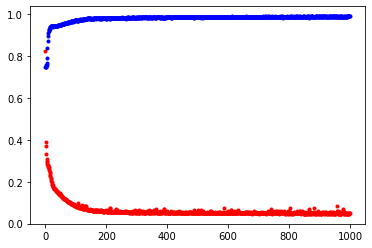

In [95]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [3]:
#-*- coding: utf-8 -*-
# 평균집값 예측 -> 연속적 수치 예측
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


import numpy
import pandas as pd
import tensorflow as tf


# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(4)

df = pd.read_csv("./dataset/housing.csv", delim_whitespace=True, header=None)
'''
print(df.info())
print(df.head())
'''
dataset = df.values
X = dataset[:, 0:13] # 13
Y = dataset[:, 13] #


# print(Y)

In [4]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu')) # 여백을 확보 = 고차원으로 확대
# , kernel_initializer='normal' # 커널초기화
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', # 연속형 수치 예측 : 비선형회귀
              optimizer='adam')

model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 22.600, 예상가격: 23.807
실제가격: 50.000, 예상가격: 25.962
실제가격: 23.000, 예상가격: 28.786
실제가격: 8.300, 예상가격: 13.546
실제가격: 21.200, 예상가격: 21.265
실제가격: 19.900, 예상가격: 24.419
실제가격: 20.600, 예상가격: 23.244
실제가격: 18.700, 예상가격: 26.010
실제가격: 16.100, 예상가격: 16.688
실제가격: 18.600, 예상가격: 8.545


In [5]:
"""
파라미터 튜닝
-(예측KerasRegressor, 분석KerasClassifier)를 통해서 scikits의 GridSeachCV를 사용
-Keras모델이 함수로 wrapper 되어져야함(모델)
-GridSearchCV에서 파라미터 keras의 모델로 전달해 튜닝

"""
# 사이킷, 케라스 같이쓰기 : 사이킷의 파이프라인, 평가함수 쓰기
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

dataframe = pd.read_csv("./dataset/housing.csv", delim_whitespace=True, header=None)

dataset = dataframe.values
X = dataset[:,0:13] # 13
Y = dataset[:,13] #
def baseline_model(optimizer='RMSprop', activation='sigmoid'): # 케라스 모델을 함수화
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation=activation))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', # 연속형 수치 예측 : 비선형회귀
              optimizer=optimizer)
    return model
def large_model(optimizer='RMSprop', activation='sigmoid'): # 성능이 제일 좋음
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation=activation))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', # 연속형 수치 예측 : 비선형회귀
              optimizer=optimizer)
    return model
def wider_model(optimizer='RMSprop', activation='sigmoid'):
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation=activation))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', # 연속형 수치 예측 : 비선형회귀
              optimizer=optimizer)
    return model
seed = 7
numpy.random.seed(seed)
 
# DL : deep learning , ML : machinelearning 트리기반, 유사도기반
# estimator : scikits 에서의 모델 , tf에서는 신경망으로 ML을 만들고 estimator라고 함
# kerasClassifier
estimator = KerasRegressor(build_fn = baseline_model, nb_epoch=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("결과 : %.2f (%.2f) MSE" % (results.mean(), results.std()))# 평균, 표준편차 : 모델평가점수

결과 : -544.94 (275.97) MSE


In [55]:
# pipeline + gridsearchcv
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("표준화된 결과 : %.2f (%.2f) MSE" % (results.mean(), results.std()))# 평균, 표준편차

pipeline.fit(X, Y)
print(X[0:5])
pipeline.predict(X[0:5])

표준화된 결과 : -40.93 (34.72) MSE
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


array([30.03546 , 25.179472, 29.438627, 27.54818 , 27.34307 ],
      dtype=float32)

In [47]:
from sklearn.model_selection import GridSearchCV

optimizer = ['RMSprop', 'Adagrad', 'Adam', 'Nadam']
param_grid = dict(mlp__optimizer=optimizer) #baseline_model optimizer 파라메터에 할당
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -253.647696 using {'mlp__optimizer': 'RMSprop'}


In [89]:
"""
문제
activation함수의 parameter tuning을 하시오
"""
optimizer = ['RMSprop', 'Adagrad', 'Adam', 'Nadam']
activation = ['relu', 'sigmoid', 'tanh']
param_grid = dict(mlp__activation=activation) #baseline_mode에 파라메터 할당
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -54.639911 using {'mlp__activation': 'sigmoid'}


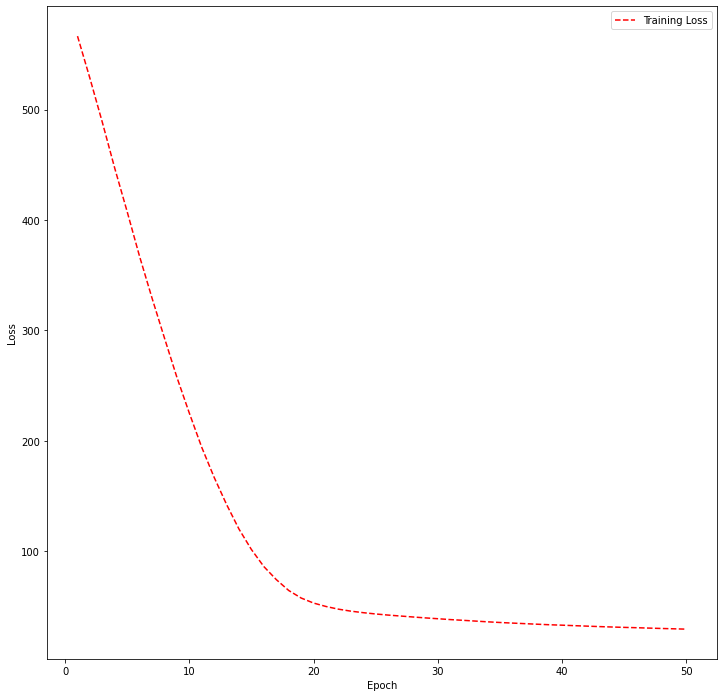

In [101]:
# history accuracy, val_loss, loss에 대한 그래프 출력 -> GridSearchCV를 하면 histroy는 어디서 구할까
history = grid_result.best_estimator_['mlp'].model.history

import matplotlib.pyplot as plt


plt.figure(figsize=(12,12))
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()